<a href="https://colab.research.google.com/github/omache/Github-Tutorial/blob/new-branch/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Fake News Detection

# Importing the Libraries

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

## Reading the datasets

In [92]:
fake = pd.read_csv("/content/sample_data/Fake.csv")
true = pd.read_csv("/content/sample_data/True.csv")

In [93]:
#checking the shape of the fake and true variables
print(f"Fake: {fake.shape}")
print(f"True: {true.shape}")


Fake: (23481, 4)
True: (21417, 4)


# Cleaning and preparing the data

In [94]:
fake['target'] = 'fake'
true['target'] = 'true'

In [95]:
#We join the two datasets
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [96]:
# We then shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop = True) # drop = True ensures that the previous index is dropped and replaced with a new one
data.head()

,title,text,subject,date,target
0,"In election test, ousted Pakistan PM's heir-ap...",LAHORE (Reuters) - In campaigning for a Pakist...,worldnews,"September 12, 2017",true
1,"Obama likely to discuss TPP, Puerto Rico with ...",WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,"February 1, 2016",true
2,Oklahoma GOP Just Took Their War On Women To ...,Republicans in Oklahoma just took their war on...,News,"April 23, 2016",fake
3,COLLEGE CAMPUS SHUTS DOWN Over Comment Made Bl...,This story is so stupid it hurts Students at W...,left-news,"Nov 28, 2015",fake
4,Mexico announces more help for migrants after ...,MEXICO CITY (Reuters) - Mexico has been increa...,politicsNews,"June 26, 2017",true


In [97]:
#The date wont be needed for analysis, and is therefore dropped
data.drop(['date'], axis = 1, inplace = True) #axis = 1 refers to the columns, inplace = true means that the data is mutated rather than new data
data.head()

,title,text,subject,target
0,"In election test, ousted Pakistan PM's heir-ap...",LAHORE (Reuters) - In campaigning for a Pakist...,worldnews,true
1,"Obama likely to discuss TPP, Puerto Rico with ...",WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,true
2,Oklahoma GOP Just Took Their War On Women To ...,Republicans in Oklahoma just took their war on...,News,fake
3,COLLEGE CAMPUS SHUTS DOWN Over Comment Made Bl...,This story is so stupid it hurts Students at W...,left-news,fake
4,Mexico announces more help for migrants after ...,MEXICO CITY (Reuters) - Mexico has been increa...,politicsNews,true


In [98]:
#Also drop the title since we only concerned with the text
data.drop(['title'], axis = 1, inplace = True)
data.head()

,text,subject,target
0,LAHORE (Reuters) - In campaigning for a Pakist...,worldnews,true
1,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,true
2,Republicans in Oklahoma just took their war on...,News,fake
3,This story is so stupid it hurts Students at W...,left-news,fake
4,MEXICO CITY (Reuters) - Mexico has been increa...,politicsNews,true


In [99]:
#convert all the text to lowercase
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,lahore (reuters) - in campaigning for a pakist...,worldnews,true
1,washington (reuters) - president barack obama ...,politicsNews,true
2,republicans in oklahoma just took their war on...,News,fake
3,this story is so stupid it hurts students at w...,left-news,fake
4,mexico city (reuters) - mexico has been increa...,politicsNews,true


In [100]:
#We remove the punctuation marks from the dataset
import string

def punctuation_removal(text):
  all_list = [char for char in text if char not in string.punctuation]
  clean_str = ''.join(all_list)
  return clean_str

data['text'] = data['text'].apply(punctuation_removal)
data.head()

,text,subject,target
0,lahore reuters in campaigning for a pakistan ...,worldnews,true
1,washington reuters president barack obama is ...,politicsNews,true
2,republicans in oklahoma just took their war on...,News,fake
3,this story is so stupid it hurts students at w...,left-news,fake
4,mexico city reuters mexico has been increasin...,politicsNews,true


In [101]:
#we remove the stopwords from the dataset
import nltk
nltk.download('stopwords') #we download the words first
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [102]:
data.head()

,text,subject,target
0,lahore reuters campaigning pakistan byelection...,worldnews,true
1,washington reuters president barack obama like...,politicsNews,true
2,republicans oklahoma took war women placed doo...,News,fake
3,story stupid hurts students western washington...,left-news,fake
4,mexico city reuters mexico increasing actions ...,politicsNews,true


## Data exploration

In [103]:
# We view the data in group format
print(data.groupby(['subject'])['text']. count())

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


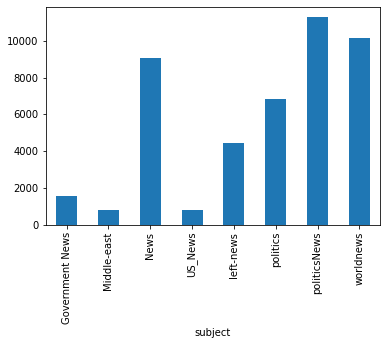

In [104]:
#We then plot this data
data.groupby(['subject'])['text'].count().plot(kind = "bar")
plt.show()

In [105]:
# Checking between fake and real
print(data.groupby(['target'])['text'].count())

target
fake    23481
true    21417
Name: text, dtype: int64


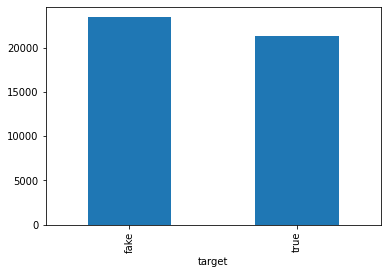

In [106]:
data.groupby(['target'])['text'].count().plot(kind = 'bar')
plt.show()

<function matplotlib.pyplot.show>

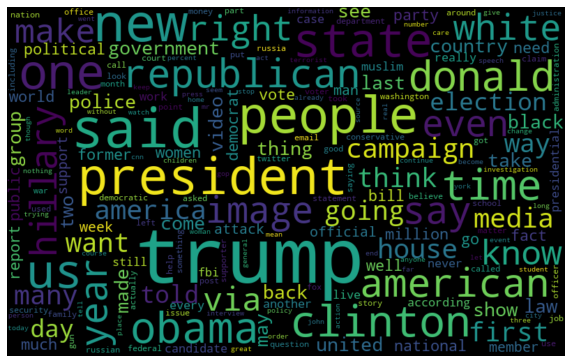

In [107]:
#Wordcloud for fake news
from wordcloud import WordCloud

fake_data = data[data['target'] == 'fake']
all_words = " ".join([text for text in fake_data.text]) #fake_data.text refers to the text column

wordcloud = WordCloud(width = 800, height = 500,
                      max_font_size = 110,
                      collocations = False).generate(all_words)

plt.figure(figsize = (10,7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show


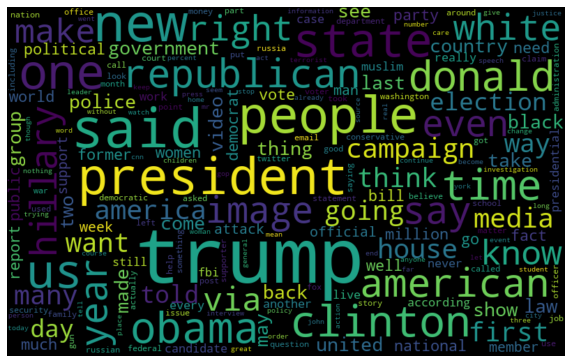

In [108]:
# Wordcloud for True news
real_news = data[data['target']=='true']
all_words2 =" ".join([text for text in real_news.text])

wordcloud2 = WordCloud(width = 800, height = 500,
                       max_font_size = 110,
                       collocations = False).generate(all_words2)

plt.figure(figsize = (10,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [109]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector) 
from nltk import tokenize
token_space = tokenize.WhitespaceTokenizer()
'''A WhitespaceTokenizer is a tokenizer that splits on and discards only whitespace characters. 
'''

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()


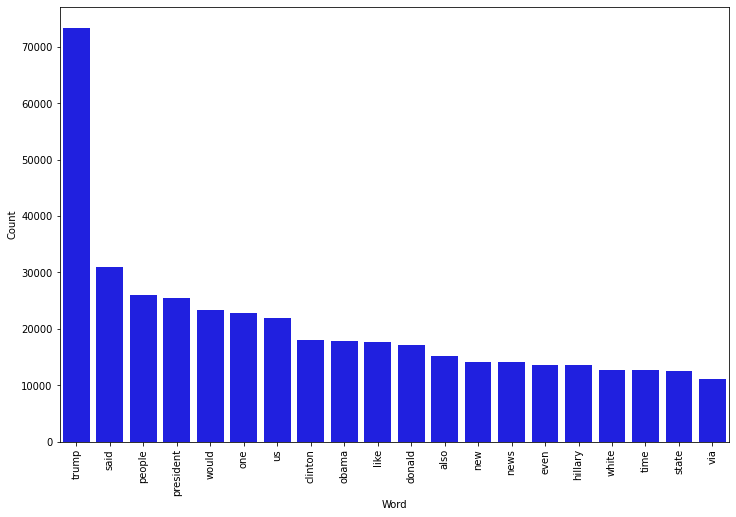

In [110]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

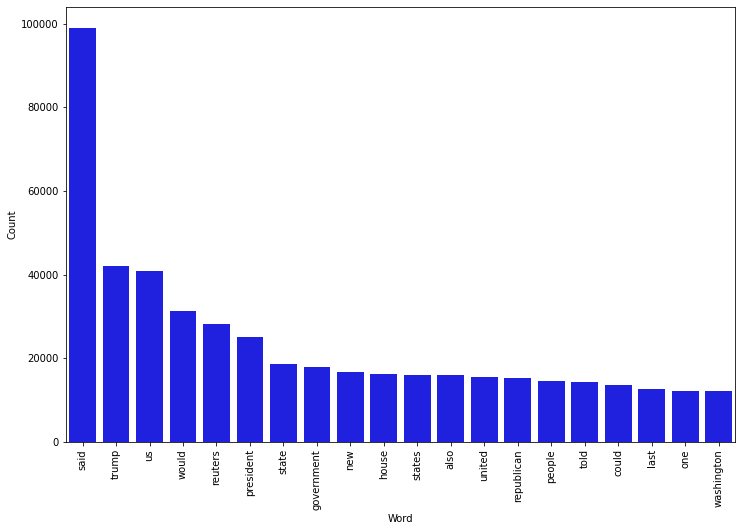

In [111]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

## Modelling the data

In [112]:
# Function to plot the confusion matrix
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = ' Confusion Matrix',
                          cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap) 
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


## Spliting the data into train and test sets


In [113]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data.target, test_size = 0.2, random_state = 1)

# Logistic Regression

In [114]:
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model',  LogisticRegression())])

'''
The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.

CountVectorizer is a great tool provided by the scikit-learn library in Python. 
It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

'''


#We then fit the model
model = pipe.fit(X_train, y_train)

#Accuracy of the fit
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))


accuracy: 98.73%


Confusion matrix, without normalization


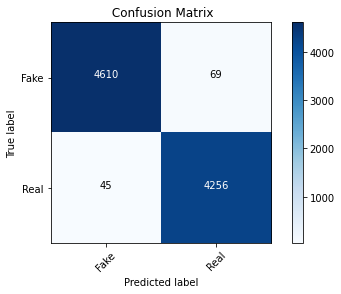

In [115]:
#confusion matrix
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Decision Tree Classifier

In [116]:
from sklearn.tree import DecisionTreeClassifier

#Vectorizing and applying TF-IDF

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])

model = pipe.fit(X_train, y_train)

#Accuracy of the mode
predictions = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))


accuracy: 98.73%


Confusion matrix, without normalization


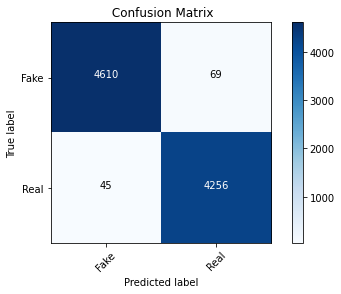

In [117]:
#plotting the confusion matrix
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Random Forest Classifier

In [118]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.71%
